In [13]:
import numpy as np
import matplotlib.pyplot as plt

 The following is the DFT of a gaussian sourced from Wolfram Alpha (Weisstein, Eric W. "Fourier Transform--Gaussian." From MathWorld--A Wolfram Web Resource. https://mathworld.wolfram.com/FourierTransformGaussian.html, 2024)

In [14]:
def GaussianFT(A, k, sf, n):
    """Generates a Discrete Fourier Transform for a gaussian in the form of y=A*e^-k*x^2

    Args:
        A (float): Amplitude of the gaussian
        k (float): x multiplier
        sf (int): Sampling Frequency
        n (_type_): FFT length

    Returns:
        (float, complex array) Frequency values, array of Fourier coefficients to be ifft (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
    """
    dt = 1/sf
    w = np.fft.fftfreq(n,dt)
    g = A*np.sqrt(np.pi/(k))*np.exp(-np.pi**2 * w**2 / k)*sf
    return w, g

Let's plot this to test our implementation against the calculated gaussian

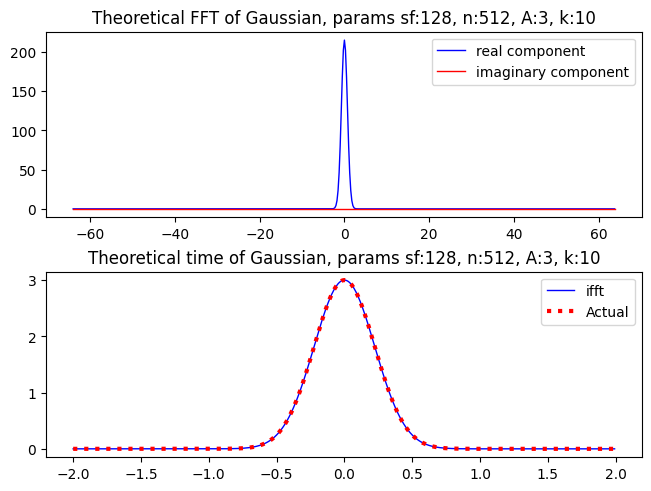

In [15]:
sf = 128
n = 512
t = (np.arange(0, n)-(n/2))/sf
fig, axs = plt.subplots(2,1, layout='constrained')
A=3
k=10
w, dtft = GaussianFT(A=A, k=k, sf=sf, n=n)

idtft = np.fft.ifft(dtft)


axs[0].plot(np.fft.fftshift(w), np.real(np.fft.fftshift(dtft)), c='b', linewidth=1, label = "real component")
axs[0].plot(np.fft.fftshift(w), np.imag(np.fft.fftshift(dtft)), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Gaussian, params sf:{}, n:{}, A:{}, k:{}".format(sf, n, A, k))
axs[0].legend()


axs[1].plot(t, np.fft.fftshift(np.real(idtft)), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, A*np.exp(-k*t**2), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Gaussian, params sf:{}, n:{}, A:{}, k:{}".format(sf, n, A, k))
axs[1].legend()

 We can apply the circular time shift property to shift this n points in time to the right

In [16]:
def GaussianFT(A, k, sf, n, shift=None):
    """Generates a Discrete Fourier Transform for a gaussian in the form of y=A*e^-k*x^2

    Args:
        A (float): Amplitude of the gaussian
        k (float): x multiplier
        sf (int): Sampling Frequency
        n (_type_): FFT length
        shift (float): Circularly time shift the function by n sample points to the right

    Returns:
        (float, complex array) Frequency values, array of Fourier coefficients to be ifft (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
    """
    dt = 1/sf
    w = np.fft.fftfreq(n,dt)
    g = A*np.sqrt(np.pi/(k))*np.exp(-np.pi**2 * w**2 / k)*sf
    if shift!=None:
        g = g*np.exp(-1j*w*shift*dt*2*np.pi)
    return w, g

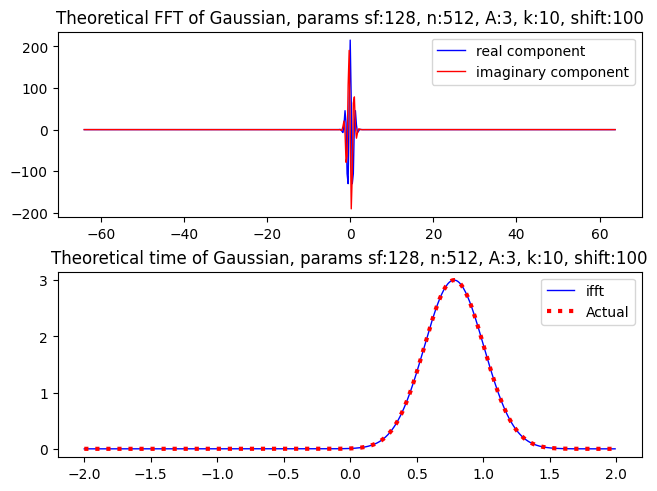

In [17]:
sf = 128
n = 512
t = (np.arange(0, n)-(n/2))/sf
fig, axs = plt.subplots(2,1, layout='constrained')
A=3
k=10
shift = 100
w, dtft = GaussianFT(A=A, k=k, sf=sf, n=n, shift=shift)

idtft = np.fft.ifft(dtft)


axs[0].plot(np.fft.fftshift(w), np.real(np.fft.fftshift(dtft)), c='b', linewidth=1, label = "real component")
axs[0].plot(np.fft.fftshift(w), np.imag(np.fft.fftshift(dtft)), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Gaussian, params sf:{}, n:{}, A:{}, k:{}, shift:{}".format(sf, n, A, k, shift))
axs[0].legend()


axs[1].plot(t, np.fft.fftshift(np.real(idtft)), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, np.roll(A*np.exp(-k*t**2), shift), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Gaussian, params sf:{}, n:{}, A:{}, k:{}, shift:{}".format(sf, n, A, k, shift))
axs[1].legend()

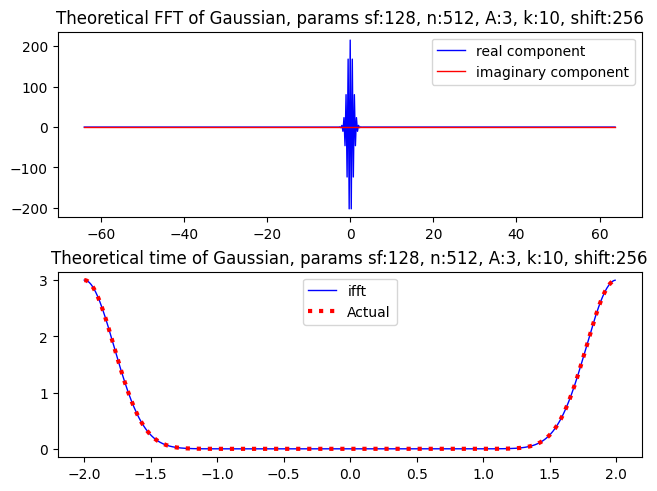

In [18]:
sf = 128
n = 512
t = (np.arange(0, n)-(n/2))/sf
fig, axs = plt.subplots(2,1, layout='constrained')
A=3
k=10
shift = int(n/2)
w, dtft = GaussianFT(A=A, k=k, sf=sf, n=n, shift=shift)

idtft = np.fft.ifft(dtft)


axs[0].plot(np.fft.fftshift(w), np.real(np.fft.fftshift(dtft)), c='b', linewidth=1, label = "real component")
axs[0].plot(np.fft.fftshift(w), np.imag(np.fft.fftshift(dtft)), c='r', linewidth=1, label = "imaginary component")
axs[0].set_title("Theoretical FFT of Gaussian, params sf:{}, n:{}, A:{}, k:{}, shift:{}".format(sf, n, A, k, shift))
axs[0].legend()


axs[1].plot(t, np.fft.fftshift(np.real(idtft)), c='b', linewidth=1, label = "ifft")
axs[1].set_title("Calculated time of Exp decay")
axs[1].plot(t, np.roll(A*np.exp(-k*t**2), shift), c='r', linewidth=3, linestyle='dotted', label = "Actual")
axs[1].set_title("Theoretical time of Gaussian, params sf:{}, n:{}, A:{}, k:{}, shift:{}".format(sf, n, A, k, shift))
axs[1].legend()

 The following is the final function developed from this exploratory process

In [19]:
def GaussianFT(A, k, sf, n, shift=None):
    """Generates a Discrete Fourier Transform for a gaussian in the form of y=A*e^-k*x^2

    Args:
        A (float): Amplitude of the gaussian
        k (float): x multiplier
        sf (int): Sampling Frequency
        n (_type_): FFT length
        shift (float): Circularly time shift the function by n sample points to the right

    Returns:
        (float, complex array) Frequency values, array of Fourier coefficients to be ifft (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
    """
    dt = 1/sf
    w = np.fft.fftfreq(n,dt)
    g = A*np.sqrt(np.pi/(k))*np.exp(-np.pi**2 * w**2 / k)*sf
    if shift!=None:
        g = g*np.exp(-1j*w*shift*dt*2*np.pi)
    return w, g